In [1]:
import pandas as pd
from altair import Chart, X, Y, Axis, Color

## Loading the dataset

In [2]:
outbrks_before_2014 = pd.read_csv("data/in/ebola-outbreaks-before-2014-cleaned.csv", encoding="utf-8", index_col=False)

In [3]:
outbrks_before_2014.head(2)

Start date    End date  Duration (days)                      Country name  \
0  2012-11-01  2013-01-31               91                            Uganda   
1  2012-06-01  2012-11-30              182  Democratic Republic of the Congo   

      Ebola subtype  Reported number of human cases  \
0       Sudan virus                               6   
1  Bundibugyo virus                              36   

   Reported number of deaths among cases  Reported % of deaths among cases  
0                                      3                             0.500  
1                                     13                             0.361

In [4]:
outbrks_before_2014.tail(2)

Start date    End date  Duration (days)                      Country name  \
31  1976-01-01  1976-12-31              365               Sudan (South Sudan)   
32  1976-01-01  1976-12-31              365  Democratic Republic of the Congo   

   Ebola subtype  Reported number of human cases  \
31   Sudan virus                             284   
32   Zaire virus                             318   

    Reported number of deaths among cases  Reported % of deaths among cases  
31                                    151                              0.53  
32                                    280                              0.88

## General information

### How many outbreaks are we talking about?

In [5]:
"There has been {} Ebola outbreaks before 2014".format(len(outbrks_before_2014))

'There has been 33 Ebola outbreaks before 2014'

### Where did they happen?

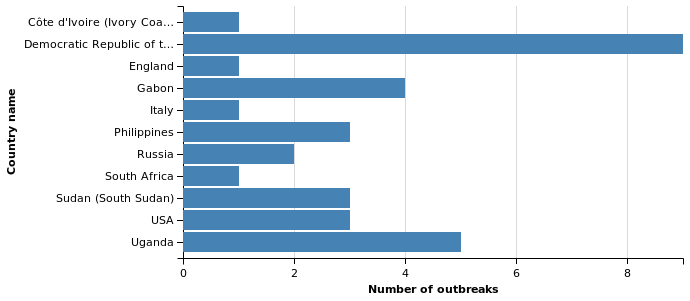

In [6]:
num_outbrks = Chart(outbrks_before_2014).mark_bar().encode(
    X('count(*):Q', axis=Axis(
            title='Number of outbreaks',
        )),
    Y('Country name:O')  
)

num_outbrks

In [7]:
unique_countries = set(outbrks_before_2014['Country name'])
print("There has been outbreaks in {} countries:".format(len(unique_countries)))

for name in unique_countries:
    print("* in {0} -> {1}".format(name, list(outbrks_before_2014['Country name']).count(name)))

There has been outbreaks in 11 countries:
* in Uganda -> 5
* in England -> 1
* in South Africa -> 1
* in Democratic Republic of the Congo -> 9
* in Russia -> 2
* in Italy -> 1
* in Gabon -> 4
* in USA -> 3
* in Philippines -> 3
* in Sudan (South Sudan) -> 3
* in Côte d'Ivoire (Ivory Coast) -> 1


### When did they happen?

In [50]:
outbrks_time= Chart(outbrks_before_2014).mark_bar().encode(
            x=X('Start date:T',
                axis=Axis(
                    title='time',
                ),
            ),
            x2='End date:T',
            y='Country name:N',
            color='Country name:N'
        )

outbrks_time

### From the recent outbreak in West Africa we all know the severity of it.
### But how many cases were reported and how many people deceased in previous outbreaks?

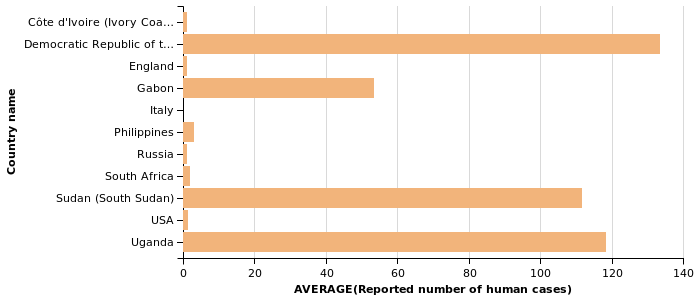

In [9]:
cases = Chart(outbrks_before_2014).mark_bar(color='#f2b47b').encode(
    X('average(Reported number of human cases):Q'),
    Y('Country name:O')  
)

cases

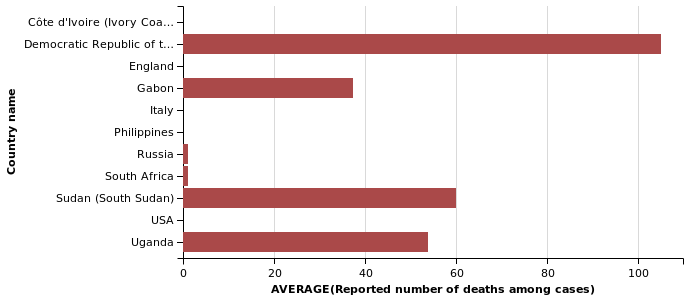

In [10]:
deceased = Chart(outbrks_before_2014).mark_bar(color='#aa4949').encode(
    X('average(Reported number of deaths among cases):Q'),
    Y('Country name:O')  
)

deceased

#### The two previous plots should be improved by normalising to the number of outbreak(s) in a country
#### It's hard to conclude. Although the proportions of cases/deaths in Sudan seem disproportionate compared to the number of outbreaks (3, same as USA and less than Gabon).

### One of my main interest was to look for a link between a virus subtype and a severity of an outbreak

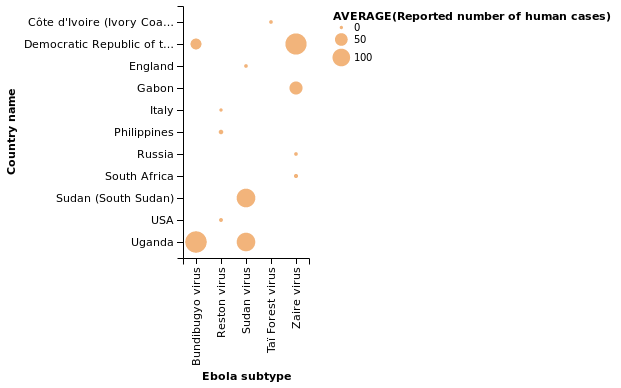

In [11]:
Chart(outbrks_before_2014).mark_circle(color='#f2b47b').encode(
    size='average(Reported number of human cases):Q',
    x=X('Ebola subtype:N'),
    y=Y('Country name:N'),
)

In [12]:
Chart(outbrks_before_2014).mark_circle(color='#aa4949').encode(
    size='average(Reported number of deaths among cases):Q',
    x=X('Ebola subtype:N'),
    y=Y('Country name:N'),
)

#### Once again, forgot to normalise by the number of outbreak(s). So it's hard to conclude.
#### We can just tell that the Reston virus subtype is the less severe.

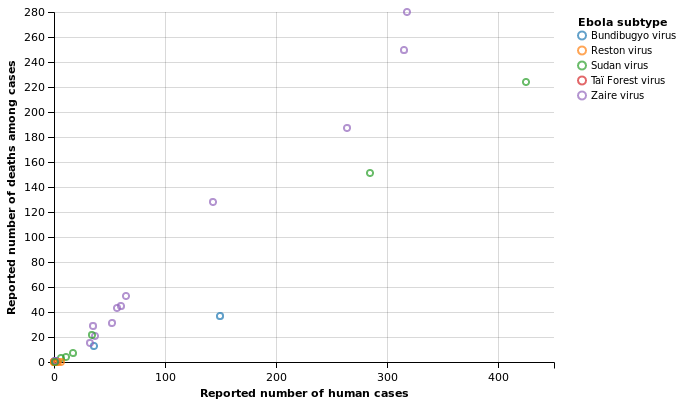

In [52]:
cases_deaths_virus = Chart(outbrks_before_2014).mark_point().encode(
    color='Ebola subtype:N',
    x='Reported number of human cases:Q',
    y='Reported number of deaths among cases:Q',
)

cases_deaths_virus

#### Unsurprisingly most outbreaks show a correlation between number of cases and number of deaths.
#### Will add zoom with Vega-Lite to make it easier to spot the Reston virus seemingly leading to less cases or deaths.

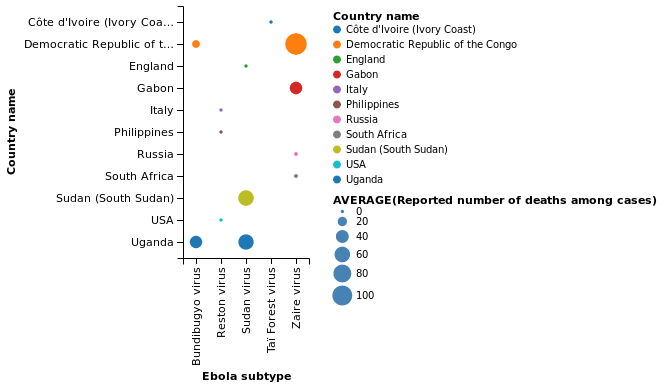

In [14]:
Chart(outbrks_before_2014).mark_circle().encode(
    size='average(Reported number of deaths among cases):Q',
    x=X('Ebola subtype:N'),
    y=Y('Country name:N'),
    color='Country name:N'
)

#### Amongst the most impacted countries Sudan and Gabon have people infected by the same virus suptype, while DRC and Uganda saw two types of viruses.
### Some of the countries share borders (DRC, Uganda and Sudan) but not necessarily the same virus subtype. Let's check when those outbreaks occured.

In [15]:
df_uganda = outbrks_before_2014[outbrks_before_2014["Country name"] == "Uganda"]

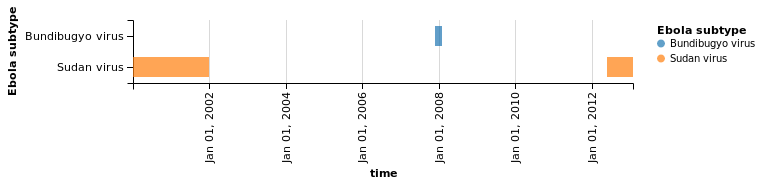

In [16]:
Chart(df_uganda).mark_bar().encode(
            x=X('Start date:T',
                axis=Axis(
                    title='time',
                ),
            ),
            x2='End date:T',
            y='Ebola subtype:N',
            color='Ebola subtype:N'
)

#### This look at the Ugandan outbreaks remind me I should plot the number of cases/deaths and normalise by the duration of the outbreaks.

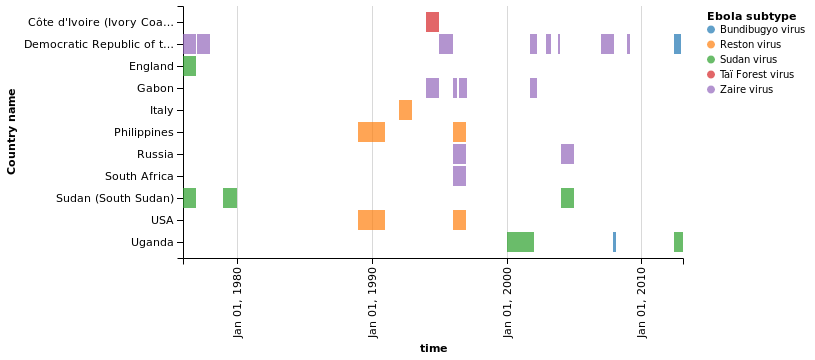

In [17]:
Chart(outbrks_before_2014).mark_bar().encode(
            x=X('Start date:T',
                axis=Axis(
                    title='time',
                ),
            ),
            x2='End date:T',
            y='Country name:N',
            color='Ebola subtype:N'
        )


#### Assuming outbreaks happening at the same period and due to the same virus subtype are due to people travelling and carrying the virus, this doesn't seem to impact nearby countries. The road networks might be better controlled than the airports.

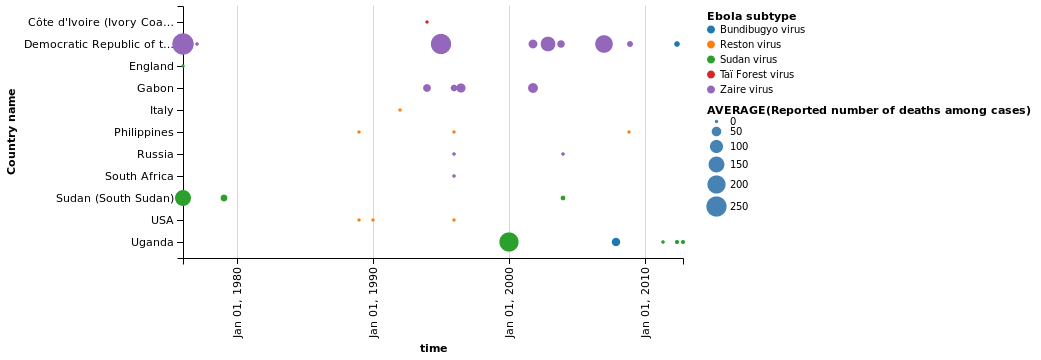

In [62]:
deaths_virus_time = Chart(outbrks_before_2014).mark_circle().encode(
            size='average(Reported number of deaths among cases):Q',
            x=X('Start date:T',
                axis=Axis(
                    title='time',
                ),
            ),
            x2='End date:T',
            y='Country name:N',
            color='Ebola subtype:N'
        )

deaths_virus_time

#### From this dataset: 
* the countries the most impacted are DRC, Gabon, Sudan and Uganda. This makes sense as they're the ones that contain natural reservoirs of the virus hosts (bats)
* the Zaire virus seems to be linked to the more outbreaks and cases/deaths, followed by the Sudan virus

### Extra information:
* the Ebola virus was first discovered in **1976**
* **2014-2016 outbreak** in West Africa (Guinea, Sierra Leone and Liberia)
* this latest outbreaks was due to the **Zaire virus**
* it was the largest and more complex and spread across borders
* it led to more cases and deaths than all previous outbreaks combined:
**28,637 reported cases** and **11,315 deaths**

sources: WHO (who.int/mediacentre/factsheets/fs103/en/), BBC (bbc.com/news/world-africa-28755033)

### More questions:
* Why is it going worse over time?
* Is the reservoir of the virus expanding? Climate change or deforestation?
* Should efforts be focused on the Zaire virus?

____

### Let's prepare our web visualisation

#### As I aim for an interactive visualisation I'll be "cheating" here and creating json in Vega-Lite format that I'll add to an html template

In [59]:
import json

# Fix to add to each plot
fix = {"$schema": "https://vega.github.io/schema/vega-lite/v2.0.json",
       "description": "A simple bar chart with embedded data."}

# Add brush
brush = {"selection": {"brush": {"type": "interval"}}}

# Add paintbrush
paintbrush = {"selection": {"paintbrush": {
                              "type": "multi", "on": "mouseover",
                              "nearest": True}}}
# for a paintbrush add size into `encoding`
size = {"condition": {"selection": "paintbrush", "value": 300},
        "value": 50}

# For zoom capacity
zoom = {"selection": { "grid": {"type": "interval", "bind": "scales"}}}

In [55]:
def from_dict_to_json(data_dict, add_on, interact):
    #remove the data key/value from the plot info
    data_dict.pop("data", None)
    data_dict.update(add_on)
    data_dict.update(interact)
    return json.dumps(data_dict)

In [65]:
num_outbrks_dict = num_outbrks.to_dict()

outbrks_data_json = json.dumps(num_outbrks_dict["data"])

In [69]:
with open("data_for_viz.json", "w") as outfile:
    outfile.write(outbrks_data_json)

In [57]:
# Plot 1 - outbreaks/country
from_dict_to_json(num_outbrks_dict, fix, brush)

'{"mark": "bar", "$schema": "https://vega.github.io/schema/vega-lite/v2.0.json", "encoding": {"y": {"type": "ordinal", "field": "Country name"}, "x": {"axis": {"title": "Number of outbreaks"}, "aggregate": "count", "type": "quantitative", "field": "*"}}, "description": "A simple bar chart with embedded data.", "selection": {"brush": {"type": "interval"}}}'

In [58]:
# Plot 2 - outbreaks over time
from_dict_to_json(outbrks_time.to_dict(), fix, zoom)

'{"mark": "bar", "$schema": "https://vega.github.io/schema/vega-lite/v2.0.json", "encoding": {"y": {"type": "nominal", "field": "Country name"}, "color": {"type": "nominal", "field": "Country name"}, "x2": {"type": "temporal", "field": "End date"}, "x": {"axis": {"title": "time"}, "type": "temporal", "field": "Start date"}}, "description": "A simple bar chart with embedded data.", "selection": {"grid": {"bind": "scales", "type": "interval"}}}'

In [61]:
# Plot 3 - cases vs deaths per virus subtype
cases_deaths_virus_dict = cases_deaths_virus.to_dict()
cases_deaths_virus_dict["encoding"]["size"] = size
cases_deaths_virus_dict.update(paintbrush)
from_dict_to_json(cases_deaths_virus_dict, fix, zoom)

'{"mark": "point", "$schema": "https://vega.github.io/schema/vega-lite/v2.0.json", "selection": {"grid": {"bind": "scales", "type": "interval"}}, "encoding": {"color": {"type": "nominal", "field": "Ebola subtype"}, "y": {"type": "quantitative", "field": "Reported number of deaths among cases"}, "x": {"type": "quantitative", "field": "Reported number of human cases"}, "size": {"value": 50, "condition": {"value": 300, "selection": "paintbrush"}}}, "description": "A simple bar chart with embedded data."}'

In [63]:
# Plot 4 - number of outbreaks
from_dict_to_json(deaths_virus_time.to_dict(), fix, zoom)

'{"mark": "circle", "$schema": "https://vega.github.io/schema/vega-lite/v2.0.json", "encoding": {"y": {"type": "nominal", "field": "Country name"}, "color": {"type": "nominal", "field": "Ebola subtype"}, "x2": {"type": "temporal", "field": "End date"}, "x": {"axis": {"title": "time"}, "type": "temporal", "field": "Start date"}, "size": {"aggregate": "average", "type": "quantitative", "field": "Reported number of deaths among cases"}}, "description": "A simple bar chart with embedded data.", "selection": {"grid": {"bind": "scales", "type": "interval"}}}'